In [1]:
import pandas as pd
import numpy as np

In [2]:

import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('online_retail_II.csv')

In [4]:
df1.shape

(525461, 8)

In [5]:
df2 = pd.read_csv('online_retail_II_1.csv')

In [6]:
# df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

In [7]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
df2.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [9]:
df = pd.concat([df1,df2])

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [12]:
df.rename(columns={'Customer ID':'Customer_ID'},inplace=True)

In [13]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer_ID    243007
Country             0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
dtype: int64

## feature engineering:
creating amount column from quantity and price

In [16]:
df['Amount'] = df['Quantity'] * df['Price']

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0


 negative quantity value in a sales dataset would typically indicate that a product or item has been returned or cancelled.

## creating new dataframe 
the new dataframe has total amount customer have spent
and the other new dataset has the frequency of each customer

In [18]:
each_customer_total_purchase = df.groupby('Customer_ID')['Amount'].sum()

In [19]:
each_customer_total_purchase.head()

Customer_ID
12346.0     -64.68
12347.0    5633.32
12348.0    2019.40
12349.0    4404.54
12350.0     334.40
Name: Amount, dtype: float64

In [20]:
each_customer_freq = df.groupby('Customer_ID')['Invoice'].count()

In [21]:
each_customer_freq.head()

Customer_ID
12346.0     48
12347.0    253
12348.0     51
12349.0    180
12350.0     17
Name: Invoice, dtype: int64

In [22]:
customer_details = pd.merge(each_customer_freq,each_customer_total_purchase,on='Customer_ID')

In [23]:
customer_details.reset_index(inplace=True)

In [24]:
customer_details.head()

,Customer_ID,Invoice,Amount
0,12346.0,48,-64.68
1,12347.0,253,5633.32
2,12348.0,51,2019.40
3,12349.0,180,4404.54
4,12350.0,17,334.40


## another attribute can be Recency
Recency in sales refers to the concept of how recently a customer has made a purchase 

In [25]:
maxdate = np.max(df['InvoiceDate'])

In [26]:
df['recency'] = maxdate-df['InvoiceDate']

In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount,recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,1062 days 09:34:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,1062 days 09:34:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,1062 days 09:34:00


In [28]:
# customer_details['recency'] = 
recency_df = df.groupby('Customer_ID')['recency'].min()

In [29]:
recency_df=recency_df.reset_index()

In [30]:
recency_df.head()

,Customer_ID,recency
0,12346.0,326 days 07:02:00
1,12347.0,40 days 04:54:00
2,12348.0,76 days 04:06:00
3,12349.0,19 days 07:28:00
4,12350.0,311 days 01:18:00


In [31]:
customer_details['recency'] = recency_df['recency'].dt.days

In [32]:
customer_details.head()

,Customer_ID,Invoice,Amount,recency
0,12346.0,48,-64.68,326
1,12347.0,253,5633.32,40
2,12348.0,51,2019.40,76
3,12349.0,180,4404.54,19
4,12350.0,17,334.40,311


## Removing outliers in amount

In [33]:
customer_details.isna().sum()

Customer_ID    0
Invoice        0
Amount         0
recency        0
dtype: int64

In [34]:
customer_details.head()

,Customer_ID,Invoice,Amount,recency
0,12346.0,48,-64.68,326
1,12347.0,253,5633.32,40
2,12348.0,51,2019.40,76
3,12349.0,180,4404.54,19
4,12350.0,17,334.40,311


In [35]:
print("The min amount is",customer_details['Amount'].min())
print("The max amount is",customer_details['Amount'].max())


The min amount is -25111.09
The max amount is 598215.22


In [36]:
z = np.quantile(customer_details['Amount'],0.25)

In [37]:
y = np.quantile(customer_details['Amount'],0.75)

In [38]:
iqr =y-z
iqr

1856.9075

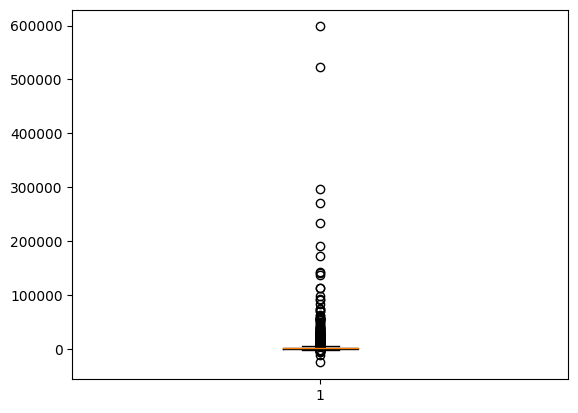

In [39]:
plt.boxplot(customer_details['Amount'])
plt.show()

In [40]:
customer_details = customer_details[(customer_details['Amount']>=z-1.5*iqr) & (customer_details['Amount']<=y+1.5*iqr)]

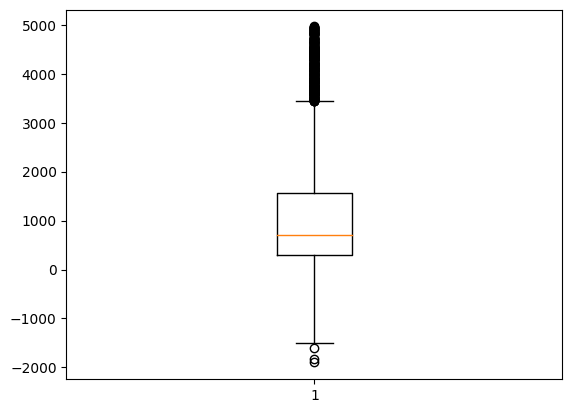

In [41]:
plt.boxplot(customer_details['Amount'])
plt.show()

We removed outliers, we didnt use q1 q3 to find iqr here to avoid loss of data

### Scaling data using standard scale

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
scaled_customer = sc.fit_transform(customer_details[customer_details.columns[1:]])

In [45]:
scaled_customer.shape

(5289, 3)

In [46]:
scaled_customer_data = pd.DataFrame(scaled_customer,columns = ['Invoice', 'Amount', 'recency'])

In [47]:
scaled_customer_data.head()

,Invoice,Amount,recency
0,-0.327996,-1.040898,0.447909
1,-0.299377,0.806301,-0.696119
2,0.931270,2.920340,-0.956957
3,-0.623733,-0.687178,0.379267
4,-0.585574,-0.716844,0.676714


In [48]:
from sklearn.cluster import KMeans

finding optimal k value

In [49]:
scores = [] 
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(scaled_customer_data)
    scores.append(kmeans.inertia_)

c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

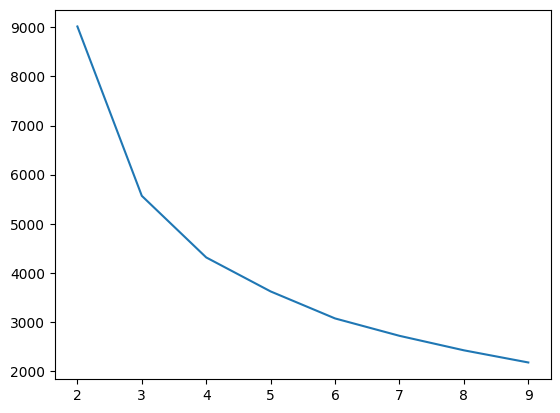

In [50]:
plt.plot(range(2,10,1),scores)
plt.xticks(ticks=range(2,10))
plt.show()

In [51]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(scaled_customer_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_customer_data,cluster_labels)
    print("For ",i," cluster the silhaoutte score is ",silhouette_avg)

c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  2  cluster the silhaoutte score is  0.47257260698179876


c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  3  cluster the silhaoutte score is  0.4424919771293333


c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  4  cluster the silhaoutte score is  0.44219038614465594


c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  5  cluster the silhaoutte score is  0.40583515996642827


c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  6  cluster the silhaoutte score is  0.3714121789343425


c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  7  cluster the silhaoutte score is  0.377011583617594


c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  8  cluster the silhaoutte score is  0.34547644170597164


c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  9  cluster the silhaoutte score is  0.357939186568721


k = 3 has more silhouette score

In [52]:
final_model = KMeans(n_clusters=3,max_iter=40).fit(scaled_customer_data)
clusters = final_model.labels_

c:\Users\pravi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
customer_details['Cluster'] = clusters

In [54]:
customer_details.head()

,Customer_ID,Invoice,Amount,recency,Cluster
0,12346.0,48,-64.68,326,0
2,12348.0,51,2019.40,76,1
3,12349.0,180,4404.54,19,2
4,12350.0,17,334.40,311,0
5,12351.0,21,300.93,376,0


In [57]:
customer_details.groupby('Cluster')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1784.0,465.017832,509.922164,-1899.67,159.275,319.385,614.160,3710.50
1,2546.0,836.834358,593.190217,-451.42,351.505,712.790,1192.085,3166.40
2,959.0,3033.405717,965.697848,862.20,2328.360,2980.080,3779.180,4966.92


In [58]:
customer_details.groupby('Cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1784.0,493.275785,140.128265,267.0,388.0,458.5,584.5,1062.0
1,2546.0,97.139827,82.747402,0.0,26.0,70.0,159.0,361.0
2,959.0,82.592284,105.758280,0.0,16.5,39.0,104.0,592.0


In [59]:
customer_details.groupby('Cluster')['Invoice'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1784.0,33.667601,35.927295,1.0,10.0,22.0,45.0,254.0
1,2546.0,55.840927,45.287020,1.0,21.0,44.0,80.0,259.0
2,959.0,243.464025,143.338689,1.0,151.0,209.0,295.0,1000.0


In [60]:
import seaborn as sns

## Visualizing Clusters

In [64]:
customer_details.to_csv('customer_details.csv')

In [65]:
df.to_csv("Final_dataset.csv")